## Importing Libraries

In [1]:
#importing libraries
import pandas as pd
import rdflib
from rdflib import Graph, URIRef, Literal, Namespace, RDF, XSD, OWL
from rdflib.namespace import RDFS
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
import networkx as nx
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph

import matplotlib.pyplot as plt
import seaborn as sns

## Loading Files

In [2]:
# Loading the National Center for Education Statistics (NCES) dropout data for the year 2002 into a Pandas DataFrame.
NCS2002_data = pd.read_excel('Original_Datasets/NCES/2002/2002.xls')
# Loading the NCES dropout data for the year 2003 into a Pandas DataFrame.
NCS2003_data = pd.read_excel('Original_Datasets/NCES/2003/2003.xls')
# Loading the NCES dropout data for the year 2004 into a Pandas DataFrame.
NCS2004_data = pd.read_excel('Original_Datasets/NCES/2004/2004.xls')
# Loading the 2010 Census data into a Pandas DataFrame from a CSV file.
census_data = pd.read_csv('Original_Datasets/Census/Census 2010.csv')

# Attempting to load the Kaiser Family Foundation (KFF) poverty data for 2010, skipping the first two rows.
try:
    porvertyKFF_data = pd.read_csv('Original_Datasets/KFF Porverty/2010-porverty.csv', skiprows=2)

# If a parsing error occurs reading the file again with a different delimiter and skipping the first two rows.
except pd.errors.ParserError:
    porvertyKFF_data = pd.read_csv('Original_Datasets/KFF Porverty/2010-porverty.csv', delimiter=';', skiprows=2)

## Dataset preprocessing and formatting

In [3]:
# Replacing all occurrences of -1 with 0 in the NCS2002_data variable
NCS2002_data = NCS2002_data.replace(-1, 0)
# Replacing all occurrences of -1 with 0 in the NCS2003_data variable
NCS2003_data = NCS2003_data.replace(-1, 0)
# Replacing all occurrences of -1 with 0 in the NCS2004_data variable
NCS2004_data = NCS2004_data.replace(-1, 0)

In [4]:
# Looping through values from 7 to 12 - grades (inclusive) realted to enrollment data 
for i in range(7, 13): 
# Checking if the current value 'i' is less than 10
    if i < 10:
         # For NCS2002_data, creating new columns 'BL{i}', 'WH{i}', and 'HI{i}' by summing corresponding columns with '0{i}' in their names
        NCS2002_data[f'BL{i}'] = NCS2002_data[f'BL0{i}M'] + NCS2002_data[f'BL0{i}F'] + NCS2002_data[f'BL0{i}U']
        NCS2002_data[f'WH{i}'] = NCS2002_data[f'WH0{i}M'] + NCS2002_data[f'WH0{i}F'] + NCS2002_data[f'WH0{i}U']
        NCS2002_data[f'HI{i}'] = NCS2002_data[f'HI0{i}M'] + NCS2002_data[f'HI0{i}F'] + NCS2002_data[f'HI0{i}U']

        # Repeating the same operations for NCS2003_data and NCS2004_data
        NCS2003_data[f'BL{i}'] = NCS2003_data[f'BL0{i}M'] + NCS2003_data[f'BL0{i}F'] + NCS2003_data[f'BL0{i}U']
        NCS2003_data[f'WH{i}'] = NCS2003_data[f'WH0{i}M'] + NCS2003_data[f'WH0{i}F'] + NCS2003_data[f'WH0{i}U']
        NCS2003_data[f'HI{i}'] = NCS2003_data[f'HI0{i}M'] + NCS2003_data[f'HI0{i}F'] + NCS2003_data[f'HI0{i}U']

        NCS2004_data[f'BL{i}'] = NCS2004_data[f'BL0{i}M'] + NCS2004_data[f'BL0{i}F'] + NCS2004_data[f'BL0{i}U']
        NCS2004_data[f'WH{i}'] = NCS2004_data[f'WH0{i}M'] + NCS2004_data[f'WH0{i}F'] + NCS2004_data[f'WH0{i}U']
        NCS2004_data[f'HI{i}'] = NCS2004_data[f'HI0{i}M'] + NCS2004_data[f'HI0{i}F'] + NCS2004_data[f'HI0{i}U']
    else:
        # If 'i' is 10 or greater, creating new columns without the leading '0' in their names
        NCS2002_data[f'BL{i}'] = NCS2002_data[f'BL{i}M'] + NCS2002_data[f'BL{i}F'] + NCS2002_data[f'BL{i}U']
        NCS2002_data[f'WH{i}'] = NCS2002_data[f'WH{i}M'] + NCS2002_data[f'WH{i}F'] + NCS2002_data[f'WH{i}U']
        NCS2002_data[f'HI{i}'] = NCS2002_data[f'HI{i}M'] + NCS2002_data[f'HI{i}F'] + NCS2002_data[f'HI{i}U']

        # Repeating the same operations for NCS2003_data and NCS2004_data
        NCS2003_data[f'BL{i}'] = NCS2003_data[f'BL{i}M'] + NCS2003_data[f'BL{i}F'] + NCS2003_data[f'BL{i}U']
        NCS2003_data[f'WH{i}'] = NCS2003_data[f'WH{i}M'] + NCS2003_data[f'WH{i}F'] + NCS2003_data[f'WH{i}U']
        NCS2003_data[f'HI{i}'] = NCS2003_data[f'HI{i}M'] + NCS2003_data[f'HI{i}F'] + NCS2003_data[f'HI{i}U']

        NCS2004_data[f'BL{i}'] = NCS2004_data[f'BL{i}M'] + NCS2004_data[f'BL{i}F'] + NCS2004_data[f'BL{i}U']
        NCS2004_data[f'WH{i}'] = NCS2004_data[f'WH{i}M'] + NCS2004_data[f'WH{i}F'] + NCS2004_data[f'WH{i}U']
        NCS2004_data[f'HI{i}'] = NCS2004_data[f'HI{i}M'] + NCS2004_data[f'HI{i}F'] + NCS2004_data[f'HI{i}U']

# Doing the same for the dropout data   
for i in range(7, 13): 
    if i < 10:
        NCS2002_data[f'BLD{i}'] = NCS2002_data[f'BLD0{i}M'] + NCS2002_data[f'BLD0{i}F'] + NCS2002_data[f'BLD0{i}U']
        NCS2002_data[f'WHD{i}'] = NCS2002_data[f'WHD0{i}M'] + NCS2002_data[f'WHD0{i}F'] + NCS2002_data[f'WHD0{i}U']
        NCS2002_data[f'HID{i}'] = NCS2002_data[f'HID0{i}M'] + NCS2002_data[f'HID0{i}F'] + NCS2002_data[f'HID0{i}U']

        NCS2003_data[f'BLD{i}'] = NCS2003_data[f'BLD0{i}M'] + NCS2003_data[f'BLD0{i}F'] + NCS2003_data[f'BLD0{i}U']
        NCS2003_data[f'WHD{i}'] = NCS2003_data[f'WHD0{i}M'] + NCS2003_data[f'WHD0{i}F'] + NCS2003_data[f'WHD0{i}U']
        NCS2003_data[f'HID{i}'] = NCS2003_data[f'HID0{i}M'] + NCS2003_data[f'HID0{i}F'] + NCS2003_data[f'HID0{i}U']

        NCS2004_data[f'BLD{i}'] = NCS2004_data[f'BLD0{i}M'] + NCS2004_data[f'BLD0{i}F'] + NCS2004_data[f'BLD0{i}U']
        NCS2004_data[f'WHD{i}'] = NCS2004_data[f'WHD0{i}M'] + NCS2004_data[f'WHD0{i}F'] + NCS2004_data[f'WHD0{i}U']
        NCS2004_data[f'HID{i}'] = NCS2004_data[f'HID0{i}M'] + NCS2004_data[f'HID0{i}F'] + NCS2004_data[f'HID0{i}U']
    else:
        NCS2002_data[f'BLD{i}'] = NCS2002_data[f'BLD{i}M'] + NCS2002_data[f'BLD{i}F'] + NCS2002_data[f'BLD{i}U']
        NCS2002_data[f'WHD{i}'] = NCS2002_data[f'WHD{i}M'] + NCS2002_data[f'WHD{i}F'] + NCS2002_data[f'WHD{i}U']
        NCS2002_data[f'HID{i}'] = NCS2002_data[f'HID{i}M'] + NCS2002_data[f'HID{i}F'] + NCS2002_data[f'HID{i}U']

        NCS2003_data[f'BLD{i}'] = NCS2003_data[f'BLD{i}M'] + NCS2003_data[f'BLD{i}F'] + NCS2003_data[f'BLD{i}U']
        NCS2003_data[f'WHD{i}'] = NCS2003_data[f'WHD{i}M'] + NCS2003_data[f'WHD{i}F'] + NCS2003_data[f'WHD{i}U']
        NCS2003_data[f'HID{i}'] = NCS2003_data[f'HID{i}M'] + NCS2003_data[f'HID{i}F'] + NCS2003_data[f'HID{i}U']

        NCS2004_data[f'BLD{i}'] = NCS2004_data[f'BLD{i}M'] + NCS2004_data[f'BLD{i}F'] + NCS2004_data[f'BLD{i}U']
        NCS2004_data[f'WHD{i}'] = NCS2004_data[f'WHD{i}M'] + NCS2004_data[f'WHD{i}F'] + NCS2004_data[f'WHD{i}U']
        NCS2004_data[f'HID{i}'] = NCS2004_data[f'HID{i}M'] + NCS2004_data[f'HID{i}F'] + NCS2004_data[f'HID{i}U']

In [5]:
# Creating separate data tables for NCS2002, NCS2003, and NCS2004 with columns 'Year' and 'State'
NCS2002_table = NCS2002_data[['YEAR', 'STNAME']]
NCS2002_table.columns = ['Year', 'State']

NCS2003_table = NCS2003_data[['YEAR', 'STNAME']]
NCS2003_table.columns = ['Year', 'State']

NCS2004_table = NCS2004_data[['YEAR', 'STNAME']]
NCS2004_table.columns = ['Year', 'State']

# Iterating through the grades and specific race/ethnicity columns related to enrollment data
for i in range(7, 13): 
    column = [f'BL{i}', f'WH{i}', f'HI{i}' ]
    for j in range(len(column)):
         # Checking if the column exists in NCS2002_data, NCS2003_data, and NCS2004_data, then copy its values to the respective year's table
        if column[j] in NCS2002_data.columns:
            NCS2002_table[column[j]] = NCS2002_data[column[j]]
        if column[j] in NCS2003_data.columns:
            NCS2003_table[column[j]] = NCS2003_data[column[j]]
        if column[j] in NCS2004_data.columns:
            NCS2004_table[column[j]] = NCS2004_data[column[j]]

# Doing the same but for dropout data
for i in range(7, 13): 
    column = [f'BLD{i}', f'WHD{i}', f'HID{i}' ]
    for j in range(len(column)):
        if column[j] in NCS2002_data.columns:
            NCS2002_table[column[j]] = NCS2002_data[column[j]]
        if column[j] in NCS2003_data.columns:
            NCS2003_table[column[j]] = NCS2003_data[column[j]]
        if column[j] in NCS2004_data.columns:
            NCS2004_table[column[j]] = NCS2004_data[column[j]]

            
NCS2002_table = NCS2002_table.replace(0, 'NaN')
NCS2003_table = NCS2003_table.replace(0, 'NaN')
NCS2004_table = NCS2004_table.replace(0, 'NaN')

print(NCS2004_table.head())
print(NCS2004_table.to_string())

   Year       State    BL7     WH7     HI7    BL8     WH8     HI8    BL9  \
0  2004     ALABAMA    NaN     NaN     NaN    NaN     NaN     NaN  24224   
1  2004      ALASKA    523    6269     423    516    6429     405    522   
2  2004     ARIZONA   4054   38393   30948   3941   38980   29049   4599   
3  2004    ARKANSAS    NaN     NaN    2011    NaN     NaN     NaN   9017   
4  2004  CALIFORNIA  40774  158469  230382  41767  165584  228262  48501   

      WH9  ...  HID9 BLD10 WHD10 HID10 BLD11 WHD11 HID11 BLD12 WHD12  HID12  
0   37997  ...    31   676   922    38   594   861    25   511   745     17  
1    6994  ...    32    50   392    48    57   406    31    70   430     55  
2   46608  ...  1902   241  1411  2296   240  1742  2367   415  2233   3464  
3     NaN  ...    71   466   813   102   462  1080   119   454  1233     92  
4  179590  ...  6482  1734  2145  6266  1818  2858  6769  3343  6296  13065  

[5 rows x 38 columns]
    Year                 State    BL7     WH7     HI

C:\Users\madub\AppData\Local\Temp\ipykernel_21748\2032503269.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NCS2002_table[column[j]] = NCS2002_data[column[j]]
C:\Users\madub\AppData\Local\Temp\ipykernel_21748\2032503269.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NCS2003_table[column[j]] = NCS2003_data[column[j]]
C:\Users\madub\AppData\Local\Temp\ipykernel_21748\2032503269.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [6]:
#census table preparation
# Removing leading and trailing whitespaces from the 'Label (Grouping)' column
census_data['Label (Grouping)'] = census_data['Label (Grouping)'].str.strip()
# Finding the index where the relevant section starts with the specified label
race_section_index = census_data[census_data['Label (Grouping)'] == 'Race alone or in combination with one or more other races'].index[0]

# Filtering the DataFrame for the specific rows starting from the identified index
rows = ['Black or African American', 'Hispanic or Latino (of any race)', 'White']
filtered_census_data = census_data.iloc[race_section_index:]
filtered_census_data = filtered_census_data[filtered_census_data['Label (Grouping)'].isin(rows)]

# Seting 'Label (Grouping)' as the index for the filtered DataFrame
filtered_census_data.set_index('Label (Grouping)', inplace=True)

# columns that contain 'Estimate' values for each state and renaming them
rename_columns = [col for col in filtered_census_data.columns if '!!Estimate' in col and 'Margin of Error' not in col]
census_table = filtered_census_data[rename_columns]
census_table.columns = [col.split("!!")[0].upper() for col in census_table.columns]

# Transposing the DataFrame for a more suitable structure
census_table = census_table.T

# Reseting the index to turn the state names into a regular column
census_table = census_table.reset_index()

# Renaming the first column (previously index) to 'State' and ing other column names if needed
census_table.rename(columns={'index': 'State'}, inplace=True)
census_table.rename(columns={'Hispanic or Latino (of any race)': 'Hispanic or Latino'}, inplace=True)

for col in census_table.columns[1:]:
    # Removing commas and converting to float
    census_table[col] = census_table[col].str.replace(',', '').astype(float)

# Displaying the first few rows of the final table
print(census_table.head())
census_table.to_csv('CSVs/census.csv', index=False)

Label (Grouping)       State       White  Black or African American  \
0                    ALABAMA   3382838.0                  1290667.0   
1                     ALASKA    526642.0                    33121.0   
2                    ARIZONA   5242273.0                   312920.0   
3                   ARKANSAS   2336002.0                   480407.0   
4                 CALIFORNIA  24611291.0                  2649422.0   

Label (Grouping)  Hispanic or Latino  
0                           182795.0  
1                            40705.0  
2                          1908914.0  
3                           182674.0  
4                         14089411.0  


In [7]:
#KFF table preparation

#Finding the index where Alabama data starts
start_data = porvertyKFF_data[porvertyKFF_data['Location'] == 'Alabama'].index[0]
end_data = porvertyKFF_data[porvertyKFF_data['Location'] == 'Puerto Rico'].index[0]

# Filtering the DataFrame from Alabama onwards
index_onwards_porvertyKFF = porvertyKFF_data.loc[start_data:end_data]

# Select the columns for 'White', 'Black', and 'Hispanic'
porvertyKFF_data_columns = ['Location', 'White', 'Black', 'Hispanic']
porvertyKFF_table = index_onwards_porvertyKFF[porvertyKFF_data_columns]

porvertyKFF_table.rename(columns={'Location': 'State'}, inplace=True)


print(porvertyKFF_table.head())
porvertyKFF_table.to_csv('CSVs/porvertyKFF.csv', index=False)

        State      White     Black   Hispanic
1     Alabama   414000.0  395400.0    53400.0
2      Alaska    36200.0       NaN     2700.0
3     Arizona   407300.0   55000.0   502700.0
4    Arkansas   312100.0  147900.0    52700.0
5  California  1420900.0  457100.0  3134400.0


C:\Users\madub\AppData\Local\Temp\ipykernel_21748\971512836.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  porvertyKFF_table.rename(columns={'Location': 'State'}, inplace=True)


In [8]:
# Replacing NAN values back to 0 across all datasets

census_table.iloc[:,1:] = census_table.iloc[:,1:].fillna(0).astype(int)
NCS2002_table.iloc[:,2:] = NCS2002_table.iloc[:,2:].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
NCS2003_table.iloc[:,2:] = NCS2003_table.iloc[:,2:].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
NCS2004_table.iloc[:,2:] = NCS2004_table.iloc[:,2:].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
porvertyKFF_table.iloc[:,1:] = porvertyKFF_table.iloc[:,1:].fillna(0).astype(int)



C:\Users\madub\AppData\Local\Temp\ipykernel_21748\4165535758.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  census_table.iloc[:,1:] = census_table.iloc[:,1:].fillna(0).astype(int)
C:\Users\madub\AppData\Local\Temp\ipykernel_21748\4165535758.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  NCS2002_table.iloc[:,2:] = NCS2002_table.iloc[:,2:].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
C:\Users\madub\AppData\Local\Temp\ipykernel_21748\4165535758.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to s

In [9]:
# Converting lowercase letters to normalize texts
census_table['State'] = census_table.State.str.lower()
porvertyKFF_table['State'] = porvertyKFF_table.State.str.lower()
NCS2002_table['State'] = NCS2002_table.State.str.lower()
NCS2003_table['State'] = NCS2003_table.State.str.lower()
NCS2004_table['State'] = NCS2004_table.State.str.lower()

# creating a dictionary to match the ethnic groups across the datasets
dic_col = {'Black or African American':'Black', 'Hispanic or Latino':'Hispanic'}
census_table = census_table.rename(columns=dic_col)

# viewing the result of the column standardization
print(census_table.columns)
print(porvertyKFF_table.columns)

Index(['State', 'White', 'Black', 'Hispanic'], dtype='object', name='Label (Grouping)')
Index(['State', 'White', 'Black', 'Hispanic'], dtype='object')


C:\Users\madub\AppData\Local\Temp\ipykernel_21748\2308268822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  porvertyKFF_table['State'] = porvertyKFF_table.State.str.lower()


## Final standardising of the Data

In [10]:
# standardizing of census_table
census_table = pd.melt(census_table, id_vars=['State'], value_name='Census', var_name='Ethnicity')

# standardizing of porvertyKFF_table
porvertyKFF_table = pd.melt(porvertyKFF_table, id_vars=['State'], value_name='Poverty', var_name='Ethnicity')

#Removing Spaces
census_table = census_table.replace(to_replace='\s+', value='', regex=True)
porvertyKFF_table = porvertyKFF_table.replace(to_replace='\s+', value='', regex=True)

# Visualisation of the results
display(census_table.head())
print()
display(porvertyKFF_table.head())


,State,Ethnicity,Census
0,alabama,White,3382838
1,alaska,White,526642
2,arizona,White,5242273
3,arkansas,White,2336002
4,california,White,24611291


,State,Ethnicity,Poverty
0,alabama,White,414000
1,alaska,White,36200
2,arizona,White,407300
3,arkansas,White,312100
4,california,White,1420900


In [11]:
# As NCES tables are more complex, I have createad a function to standardize of the data
def NCES_Stracture(table):
    # Copying the table
    nces_df = table.copy()

    # Segregating enrollments from dropouts
    nces_df_t1 = nces_df[['Year', 'State', 
                          'BL7', 'WH7', 'HI7', 'BL8', 'WH8', 'HI8', 'BL9', 'WH9', 'HI9', 'BL10', 'WH10', 'HI10', 
                          'BL11', 'WH11', 'HI11', 'BL12', 'WH12', 'HI12']]

    nces_df_t2 = nces_df[['Year', 'State', 
                          'BLD7', 'WHD7', 'HID7', 'BLD8', 'WHD8', 'HID8', 'BLD9', 'WHD9', 'HID9', 'BLD10', 'WHD10', 'HID10', 
                          'BLD11', 'WHD11', 'HID11', 'BLD12', 'WHD12', 'HID12']]

    # Creating standardization between columns of the same information
    nces_df_t11 = pd.melt(nces_df_t1, id_vars=['Year', 'State'], value_name='Enrollment')

    # Segregating Ethinicity and grades columns
    nces_df_t11['Ethnicity'] = nces_df_t11['variable'].str[:2]
    nces_df_t11['Grade'] = nces_df_t11['variable'].str[2:]

    nces_df_t11.drop('variable', axis=1, inplace=True)

    # Creating standardization between columns of the same information
    nces_df_t21 = pd.melt(nces_df_t2, id_vars=['Year', 'State'], value_name='Dropout')

    # Separating columns that indicate ethnicity and grade
    nces_df_t21['Ethnicity'] = nces_df_t21['variable'].str[:2]
    nces_df_t21['Grade'] = nces_df_t21['variable'].str[3:]

    nces_df_t21.drop('variable', axis=1, inplace=True)

    # Merging the two sets with the above changes
    nces_df_copy = nces_df_t11.merge(nces_df_t21, on=['Year','State','Ethnicity','Grade'])

    # Organizing the dataset
    nces_df_copy = nces_df_copy[['Year','State','Ethnicity','Grade','Enrollment','Dropout']]
    
    # Standardizing ethnic names
    dic_etnia = {'WH':'White', 'BL':'Black', 'HI':'Hispanic'}
    nces_df_copy['Ethnicity'] = nces_df_copy['Ethnicity'].map(dic_etnia)
    
    # returning the result of the function
    return nces_df_copy

# Passing the datasets
NCS2002_table = NCES_Stracture(NCS2002_table)
NCS2003_table = NCES_Stracture(NCS2003_table)
NCS2004_table = NCES_Stracture(NCS2004_table)

# Adding the datasets together
nces_table = pd.concat([NCS2002_table,NCS2003_table,NCS2004_table], ignore_index=True)

# visualisation of the 'new' dataset
nces_table.head()

,Year,State,Ethnicity,Grade,Enrollment,Dropout
0,2002,alabama,Black,7,22817,18
1,2002,alaska,Black,7,532,5
2,2002,arizona,Black,7,3612,187
3,2002,arkansas,Black,7,0,0
4,2002,california,Black,7,43647,63


In [12]:
# Saving tables in CSV

nces_table.to_csv('newCSVs/nces.csv', index=False)
census_table.to_csv('newCSVs/census.csv', index=False)
porvertyKFF_table.to_csv('newCSVs/porvertyKFF.csv', index=False)

## Linked Data Conversion

In [13]:


# creating the name of the space and creating the graphs for poverty and census
ex = Namespace("http://educationaldata.org/")

census_graph = Graph()
poverty_graph = Graph()

# converting df into triples for census and poverty
for idx, row in census_table.iterrows():
    state_uri = ex[row['State'].replace(' ', '_')]
    ethnicity_uri = ex[row['Ethnicity'].replace(' ', '_')]
    census_graph.add((state_uri, RDF.type, ex.State))
    census_graph.add((state_uri, ex.Census, Literal(row['Census'])))
    census_graph.add((state_uri, ex.hasEthnicityData, ethnicity_uri))


for idx, row in porvertyKFF_table.iterrows():
    state_uri = ex[row['State'].replace(' ', '_')]
    ethnicity_uri = ex[row['Ethnicity'].replace(' ', '_')]
    poverty_graph.add((state_uri, RDF.type, ex.State))
    poverty_graph.add((state_uri, ex.Poverty, Literal(row['Poverty'])))
    poverty_graph.add((state_uri, ex.hasEthnicityData, ethnicity_uri))


# saving the triples into rdf files
census_graph.serialize(destination='census.rdf', format='xml')
poverty_graph.serialize(destination='poverty.rdf', format='xml')



<Graph identifier=N37f7112fd11640d49f58d265f616c923 (<class 'rdflib.graph.Graph'>)>

In [14]:
# creating the name aontology and creating graphs
ex = Namespace("http://educationaldata.org/")
ontology = ex['ontology']

nces_graph = Graph()
nces_graph.bind("ex", ex)

# Converting the df to triples
for idx, row in nces_table.iterrows():
    # creatin URIs based on: grades, states and ethnicities
    record_uri = ex[f"{row['State'].replace(' ', '_')}-{row['Ethnicity'].replace(' ', '_')}-{row['Year']}-{row['Grade']}"]
    state_uri = ex[row['State'].replace(' ', '_')]
    ethnicity_uri = ex[row['Ethnicity'].replace(' ', '_')]

    # Adding the triples
    nces_graph.add((record_uri, RDF.type, ex.Record))
    nces_graph.add((record_uri, ex.hasState, state_uri))
    nces_graph.add((record_uri, ex.hasEthnicity, ethnicity_uri))
    nces_graph.add((record_uri, ex.Year, Literal(row['Year'], datatype=XSD.integer)))
    nces_graph.add((record_uri, ex.Grade, Literal(row['Grade'], datatype=XSD.integer)))
    nces_graph.add((record_uri, ex.Enrollment, Literal(row['Enrollment'], datatype=XSD.integer)))
    nces_graph.add((record_uri, ex.Dropout, Literal(row['Dropout'], datatype=XSD.float)))

    # making sure state and ethinicity are correct
    nces_graph.add((state_uri, RDF.type, ex.State))
    nces_graph.add((ethnicity_uri, RDF.type, ex.Ethnicity))
    
nces_graph.serialize(destination='nces.rdf', format='xml')

<Graph identifier=N608f1dbdeced44d49ce64b953480a02d (<class 'rdflib.graph.Graph'>)>

In [15]:
# creating the namespace, graph for the linked data and loading previous rdf files
ex = Namespace("http://educationaldata.org/")

census_graph = Graph()
census_graph.parse('census.rdf', format='xml')

nces_graph = Graph()
nces_graph.parse('nces.rdf', format='xml')

poverty_graph = Graph()
poverty_graph.parse('poverty.rdf', format='xml')

linked_data_graph = Graph()

# looping through the census the poverty rdf files and adding the data
for state in census_graph.subjects(RDF.type, ex.State):
    for p, o in census_graph.predicate_objects(subject=state):
        linked_data_graph.add((state, p, o))
    for p, o in poverty_graph.predicate_objects(subject=state):
        linked_data_graph.add((state, p, o))

# looping through the NCES rdf, adding the data into the new rdf linked data file
for record_uri in nces_graph.subjects(RDF.type, ex.Record):
    state_uri = nces_graph.value(subject=record_uri, predicate=ex.hasState)
    if not state_uri:
        continue 
    enrollment = nces_graph.value(subject=record_uri, predicate=ex.Enrollment)
    dropout = nces_graph.value(subject=record_uri, predicate=ex.Dropout)
    year = nces_graph.value(subject=record_uri, predicate=ex.Year)
    grade = nces_graph.value(subject=record_uri, predicate=ex.Grade)
    
    if enrollment:
        linked_data_graph.add((state_uri, ex['Enrollment_' + str(year) + '_' + str(grade)], Literal(enrollment, datatype=XSD.integer)))
    if dropout:
        linked_data_graph.add((state_uri, ex['Dropout_' + str(year) + '_' + str(grade)], Literal(dropout, datatype=XSD.float)))

# saving rdf file
linked_data_graph.serialize(destination='linked_data_detailed.rdf', format='xml')

<Graph identifier=Nafaf7e4c5b7e491fad8f2df1a7aa94ad (<class 'rdflib.graph.Graph'>)>

In [16]:
# creating name, new graph and ontology
ex = Namespace("http://educationaldata.org/")
owl = Namespace(OWL)

ontology_graph = Graph()

ontology_graph.bind("ex", ex)
ontology_graph.bind("owl", OWL)

# creating the classes
classes = [ex.State, ex.Ethnicity, ex.Record, ex.CensusData, ex.PovertyData, ex.EducationalRecord]
for cls in classes:
    ontology_graph.add((cls, RDF.type, OWL.Class))

# creating the object propertties by poverty, census, educational redord and ethinicity
object_properties = {
    ex.hasEthnicityData: (ex.State, ex.Ethnicity),
    ex.hasCensusData: (ex.State, ex.CensusData),
    ex.hasPovertyData: (ex.State, ex.PovertyData),
    ex.hasEducationalRecord: (ex.State, ex.EducationalRecord),
}

for prop, (domain, range_) in object_properties.items():
    ontology_graph.add((prop, RDF.type, OWL.ObjectProperty))
    ontology_graph.add((prop, RDFS.domain, domain))
    ontology_graph.add((prop, RDFS.range, range_))

# creating datatype properties
datatype_properties = {
    ex.Census: ex.CensusData,
    ex.Poverty: ex.PovertyData,
    ex.Year: ex.EducationalRecord,
    ex.Grade: ex.EducationalRecord,
    ex.Enrollment: ex.EducationalRecord,
    ex.Dropout: ex.EducationalRecord,
}

for prop, domain in datatype_properties.items():
    ontology_graph.add((prop, RDF.type, OWL.DatatypeProperty))
    ontology_graph.add((prop, RDFS.domain, domain))
    ontology_graph.add((prop, RDFS.range, XSD.integer))  # Assuming all are integers for simplicity

# creating the OWL file
ontology_graph.serialize(destination='ontology.owl', format='xml')

<Graph identifier=Nf8ecca4e2c0845888c12a2bea0359b50 (<class 'rdflib.graph.Graph'>)>

## Extracting Data from rdf files

In [17]:

#loading census.rdf and creating name
g = Graph()
g.parse('census.rdf', format='xml')

ex = Namespace("http://educationaldata.org/")

# creating a list and dic to save census and ethnicity values
state_ethnicities = {} 
census_values = []

# looping thourugh the triples to extract the census data
for state, _, census in g.triples((None, ex.Census, None)):
    state_name = str(state).split('/')[-1]
    census_values.append(int(census))
    state_ethnicities[state_name] = [] #empty list for ethinicity 

# looping through triples to get the ethnicity and associate them to the right states
for state, _, ethn in g.triples((None, ex.hasEthnicityData, None)):
    state_name = str(state).split('/')[-1]
    ethn_name = str(ethn).split('/')[-1]
    state_ethnicities[state_name].append(ethn_name)

# builfing the lists for the new table
states = []
ethns = []
for state, ethnicities in state_ethnicities.items():
    states.extend([state] * len(ethnicities))
    ethns.extend(ethnicities)

# new table
census_table_2 = pd.DataFrame({'State': states, 'Ethnicity': ethns, 'Census': census_values})

In [18]:
census_table_2[(census_table_2['State'].isin(['alabama', 'texas'])) & (census_table_2['Ethnicity'].isin(['White', 'Hispanic', 'Black']))].sort_values(['State','Ethnicity'])

,State,Ethnicity,Census
118,alabama,Black,1290667
119,alabama,Hispanic,182795
117,alabama,White,3382838
109,texas,Black,3159265
110,texas,Hispanic,9533880
108,texas,White,19191255


In [19]:
census_table[(census_table['State'].isin(['alabama', 'texas'])) & (census_table['Ethnicity'].isin(['White', 'Hispanic', 'Black']))].sort_values(['State','Ethnicity'])

,State,Ethnicity,Census
52,alabama,Black,1290667
104,alabama,Hispanic,182795
0,alabama,White,3382838
95,texas,Black,3159265
147,texas,Hispanic,9533880
43,texas,White,19191255


In [20]:
# Load the RDF file
g = Graph()
g.parse('poverty.rdf', format='xml')

ex = Namespace("http://educationaldata.org/")

# Containers for the extracted data
data = []

# Iterate through the graph to extract states, their ethnicities, and poverty values
for state_uri in g.subjects(RDF.type, ex.State):
    state = state_uri.split('/')[-1].replace('_', ' ')
    
    # Get all ethnicity URIs linked to the state
    ethnicity_uris = g.objects(subject=state_uri, predicate=ex.hasEthnicityData)
    poverty_values = g.objects(subject=state_uri, predicate=ex.Poverty)

    for ethnicity_uri, p in zip(ethnicity_uris, poverty_values):
        ethnicity = ethnicity_uri.split('/')[-1].replace('_', ' ')
        data.append({"State": state, "Ethnicity": ethnicity, "Poverty": str(p)})
       
# Create a DataFrame from the data list
povertyKFF_table2 = pd.DataFrame(data)




In [21]:
# extraido do arquivo rdf
povertyKFF_table2[(povertyKFF_table2['State'].isin(['alabama', 'texas'])) & (povertyKFF_table2['Ethnicity'].isin(['White', 'Hispanic', 'Black']))].sort_values(['State','Ethnicity'])

,State,Ethnicity,Poverty
117,alabama,Black,395400
118,alabama,Hispanic,53400
116,alabama,White,414000
60,texas,Black,680700
61,texas,Hispanic,2475100
59,texas,White,1039400


In [22]:
porvertyKFF_table[(porvertyKFF_table['State'].isin(['alabama', 'texas'])) & (porvertyKFF_table['Ethnicity'].isin(['White', 'Hispanic', 'Black']))].sort_values(['State','Ethnicity'])


,State,Ethnicity,Poverty
52,alabama,Black,395400
104,alabama,Hispanic,53400
0,alabama,White,414000
95,texas,Black,680700
147,texas,Hispanic,2475100
43,texas,White,1039400


In [23]:
# loading rdf file and creating namespace
g = Graph()
g.parse('nces.rdf', format='xml')

ex = Namespace("http://educationaldata.org/")

# creating ver for the data
data = []

# loopling through the graph
for record in g.subjects(RDF.type, ex.Record):
    #  saving records of the state
    state = g.value(subject=record, predicate=ex.hasState)
    if state:  # spliting url to get only the name of the state
        state = state.split('/')[-1].replace('_', ' ')
    #  saving records of the ethnicity
    ethnicity = g.value(subject=record, predicate=ex.hasEthnicity)
    if ethnicity:  # spliting URI
        ethnicity = ethnicity.split('/')[-1].replace('_', ' ')
    #  saving records of the year
    year = g.value(subject=record, predicate=ex.Year)
    #  saving records of the grade
    grade = g.value(subject=record, predicate=ex.Grade)
    #  saving records of the enrollment
    enrollment = g.value(subject=record, predicate=ex.Enrollment)
    #  saving records of the dropout
    dropout = g.value(subject=record, predicate=ex.Dropout)

    # adding data to the list
    data.append({
        "Year": year.toPython() if year else None,
        "State": state,
        "Ethnicity": ethnicity,
        "Grade": grade.toPython() if grade else None,
        "Enrollment": enrollment.toPython() if enrollment else None,
        "Dropout": dropout.toPython() if dropout else None,
    })

# creating new table
nces_table2 = pd.DataFrame(data)
nces_table2.fillna(0, inplace=True)
nces_table2['Enrollment'] = nces_table2['Enrollment'].astype(int)
nces_table2['Dropout'] = nces_table2['Dropout'].astype(int)

In [24]:

nces_table2['Year'] = pd.to_numeric(nces_table2['Year'], errors='coerce')
nces_table2['Grade'] = pd.to_numeric(nces_table2['Grade'], errors='coerce')

# ordering by ethnicity
ethnicity_order = ['Black', 'White', 'Hispanic']  
nces_table2['Ethnicity'] = pd.Categorical(nces_table2['Ethnicity'], categories=ethnicity_order, ordered=True)

#sorting the table
nces_table2 = nces_table2.sort_values(by=['Year', 'Ethnicity', 'Grade', 'State'])
#nces_table2[(nces_table2['State'].isin(['alabama', 'texas'])) & (nces_table2['Ethnicity'].isin(['White', 'Hispanic', 'Black']))].sort_values(['State','Ethnicity'])

## Data Analysis

As the census and poverty tables has the same dimmensions, I will merge them so we can proceed with the analysis. 

In [25]:
census_poverty_table2 = census_table_2.merge(povertyKFF_table2, on=['State','Ethnicity'])
census_poverty_table2.to_csv('census_poverty2.csv', index=False)
census_poverty_table2['Census'] = census_poverty_table2['Census'].astype(int)
census_poverty_table2['Poverty'] = census_poverty_table2['Poverty'].astype(int)
census_poverty_table2.head()

,State,Ethnicity,Census,Poverty
0,newjersey,White,6278395,301100
1,newjersey,Black,1293921,198800
2,newjersey,Hispanic,1564037,298700
3,tennessee,White,5079389,658400
4,tennessee,Black,1117185,294400


## Results of Populations (%) vs Population in Poverty (%) per Ethnicity

In [26]:
# Calculating the total proportion per ethnicity
population_ethnicity = census_poverty_table2.groupby('Ethnicity')['Census'].sum()

# Calculating the total population in poverty per ethnicity
poverty_ethnicity = census_poverty_table2.groupby('Ethnicity')['Poverty'].sum()

# Calculating the total population in poverty in relation to all ethnicities
poverty_total = poverty_ethnicity.sum()

# Calcular a proporção de cada etnia em relação à população total
porportion_pop_ethn = (population_ethnicity / population_ethnicity.sum()) * 100

# Calculating the proportion of each ethnicity in relation to the total population
proportion_pov_ethn= (poverty_ethnicity / poverty_total) * 100

# Table to save the results
proportion_table = pd.DataFrame({'Population(%)': porportion_pop_ethn,
                             'Population_In_Poverty(%)': proportion_pov_ethn})

# Reseting indexes to make the 'Ethnicity' column regular
proportion_table.reset_index(inplace=True)

# Sorting the table by the 'Population(%)' column
proportion_table_sorted = proportion_table.sort_values(by='Population(%)', ascending=False)

print(proportion_table_sorted)

  Ethnicity  Population(%)  Population_In_Poverty(%)
2     White      71.127152                 46.318253
1  Hispanic      16.159788                 31.479479
0     Black      12.713060                 22.202269


The analysis delineates the demographic composition, revealing that the White population constitutes 71.12% of the total population, followed by the Hispanic population at 16.12%, and the Black population at 12.71%. Furthermore, a pronounced correlation between the total population and the poverty-stricken population is identified:

 ## Relationship between the total population and the Population in Poverty by State


In [27]:
#Correlation
census_poverty_table2['Census'].corr(census_poverty_table2['Poverty'])

0.7722615857135527

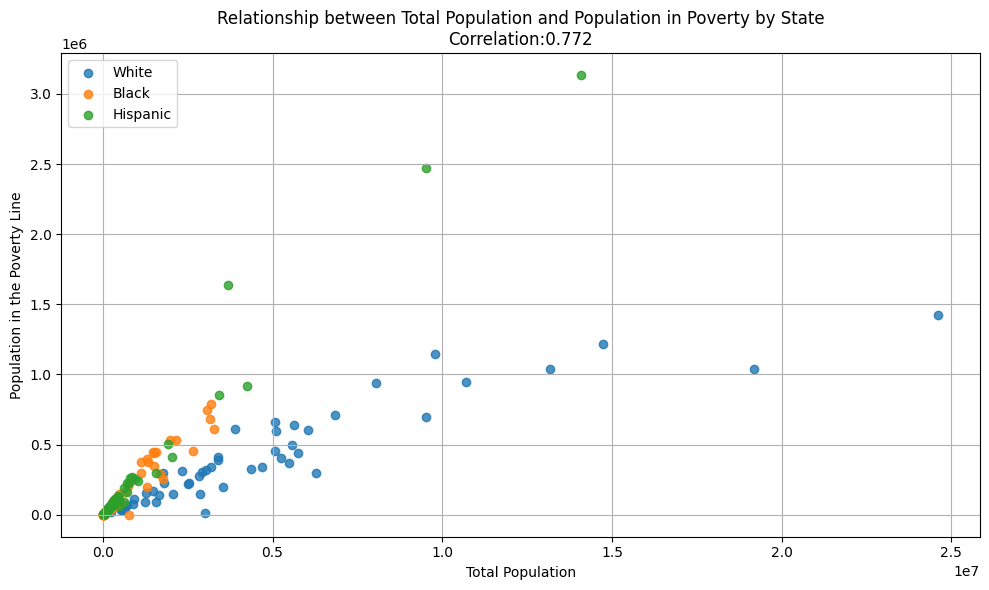

In [28]:
plt.figure(figsize=(10, 6))
for Ethnicity in census_poverty_table2['Ethnicity'].unique():
    data = census_poverty_table2[census_poverty_table2['Ethnicity'] == Ethnicity]
    plt.scatter(data['Census'], data['Poverty'], label=Ethnicity, alpha=0.8)

plt.title(f"Relationship between Total Population and Population in Poverty by State\nCorrelation:{round(census_poverty_table2['Census'].corr(census_poverty_table2['Poverty']),3)}")
plt.xlabel('Total Population')
plt.ylabel('Population in the Poverty Line')
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

The correlation coefficient of 0.786 between the total population and the prevalence of poverty indicates a significant positive relationship. This suggests that states with larger populations are more likely to have a greater number of individuals living in poverty.


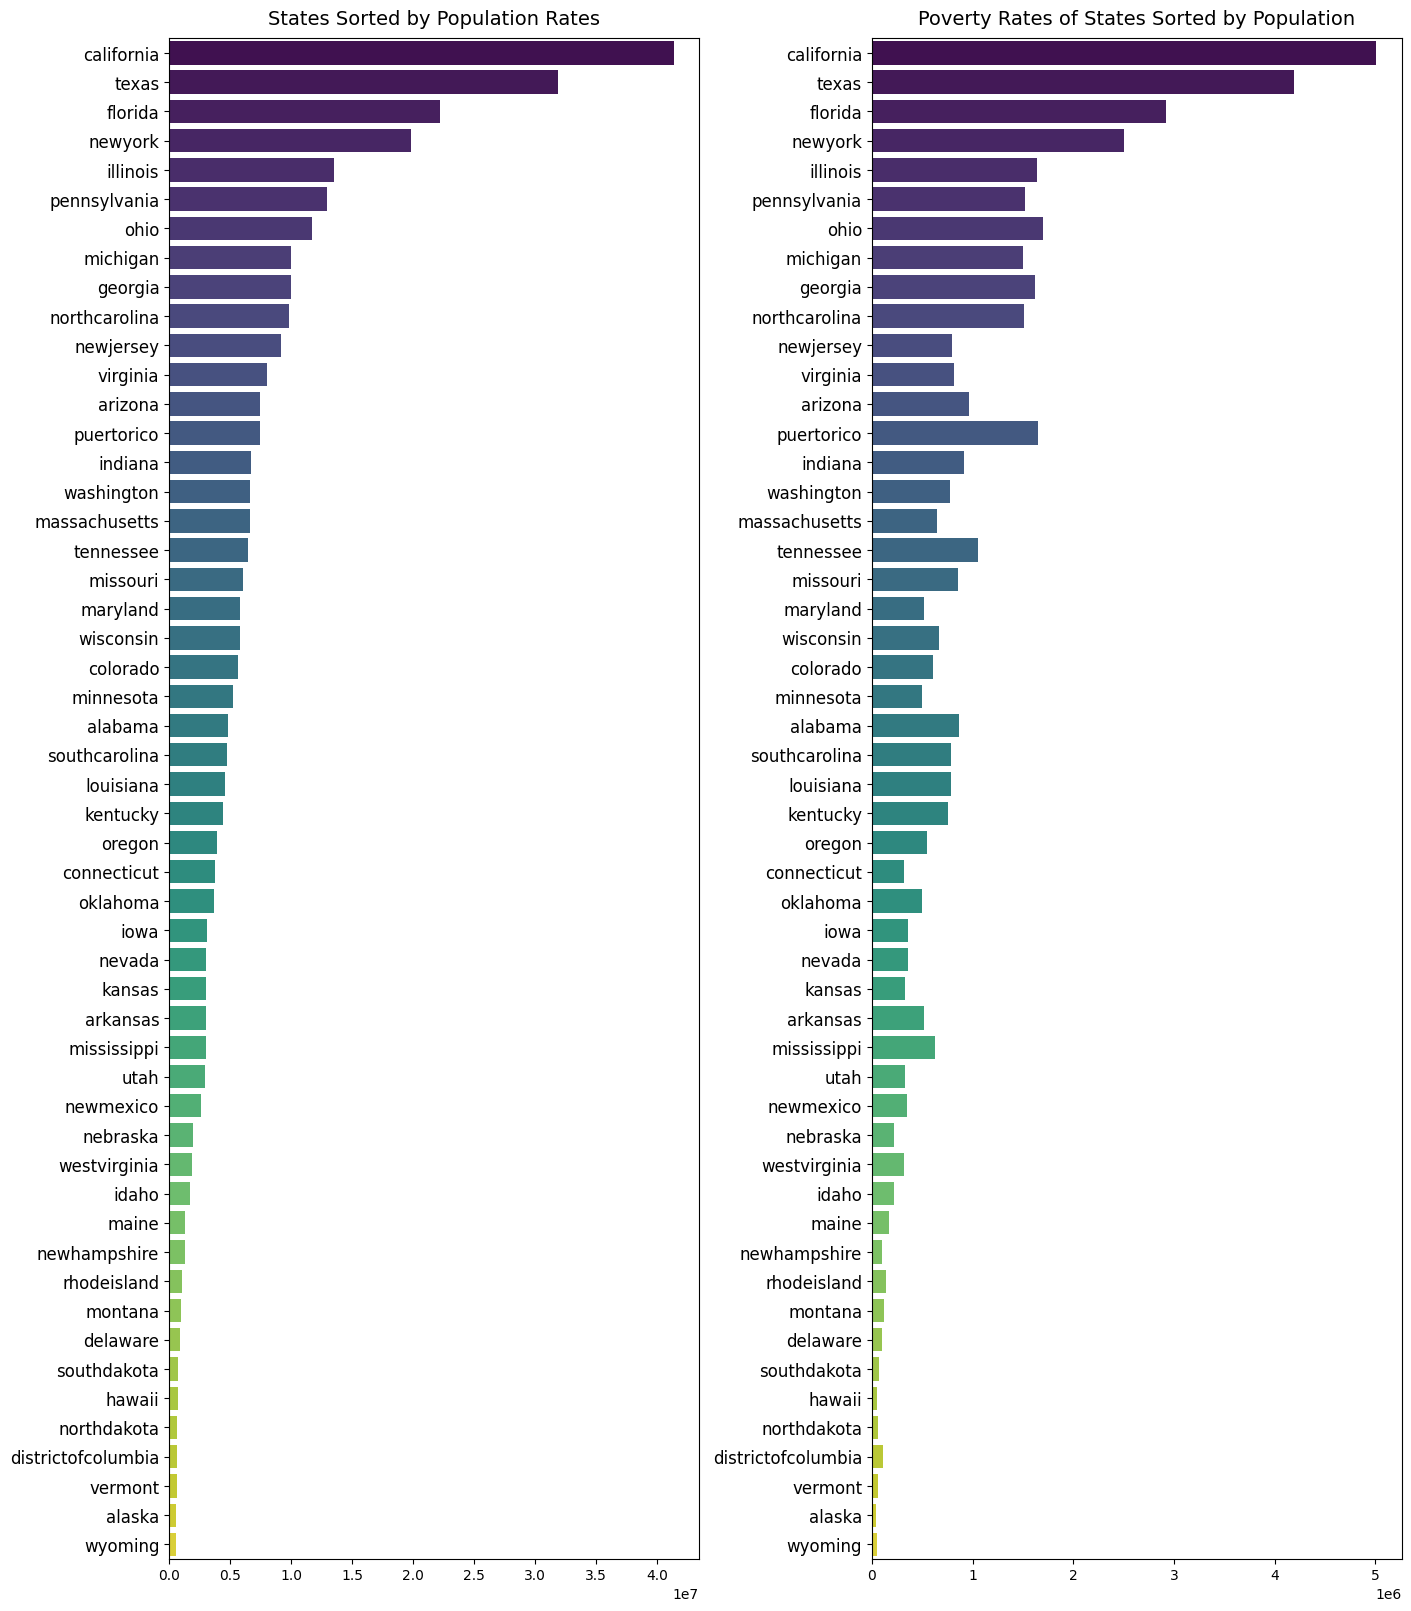

In [29]:

#Sorting the census_poverty_table
census_poverty_sorted = census_poverty_table2.groupby(['State']).agg({'Census':sum,
                                                               'Poverty':sum}).sort_values('Census', ascending=False)

fig = plt.figure(constrained_layout=True, figsize=(14, 16))
fig.set_constrained_layout_pads(hspace=0.1)

# Plotting graphs
gs = plt.GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

sns.barplot(x='Census', y=census_poverty_sorted.index, data=census_poverty_sorted, ax=ax1, palette='viridis')
ax1.tick_params(axis='y', labelsize=12)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('States Sorted by Population Rates', size=14, pad=10)

sns.barplot(x='Poverty', y=census_poverty_sorted.index, data=census_poverty_sorted, ax=ax2, palette='viridis')
ax2.tick_params(axis='y', labelsize=12)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Poverty Rates of States Sorted by Population', size=14, pad=10)

plt.show()

This preliminary data allows for the anticipation of ethnic disparities in poverty rates. Despite the White population making up 71.12% of the total, their proportion of the poverty-stricken population does not surpass 50%.

Advancing the analysis to the poverty line's demographic proportions validates these expectations:

## Proportion of the population in the poverty line per Ethnicity


In [30]:
# Criando o agrupamento
census_poverty_group = census_poverty_table2.groupby(['Ethnicity']).agg({'Census':'sum','Poverty':'sum'}).reset_index()

# Calculando a proporção
census_poverty_group['percent_poverty'] = (census_poverty_group['Poverty'] / census_poverty_group['Census'])*100
census_poverty_group

,Ethnicity,Census,Poverty,percent_poverty
0,Black,42805394,9791800,22.875154
1,Hispanic,54410670,13883300,25.515767
2,White,239488042,20427600,8.529695


The data reveal that 25.51% of the Hispanic population and 22.87% of the Black population live below the poverty line, compared to 8.52% of the White population. For a more tangible comparison, a segment from two graphical representations illustrates the distribution of the general and poverty-stricken populations by ethnicity across the states:

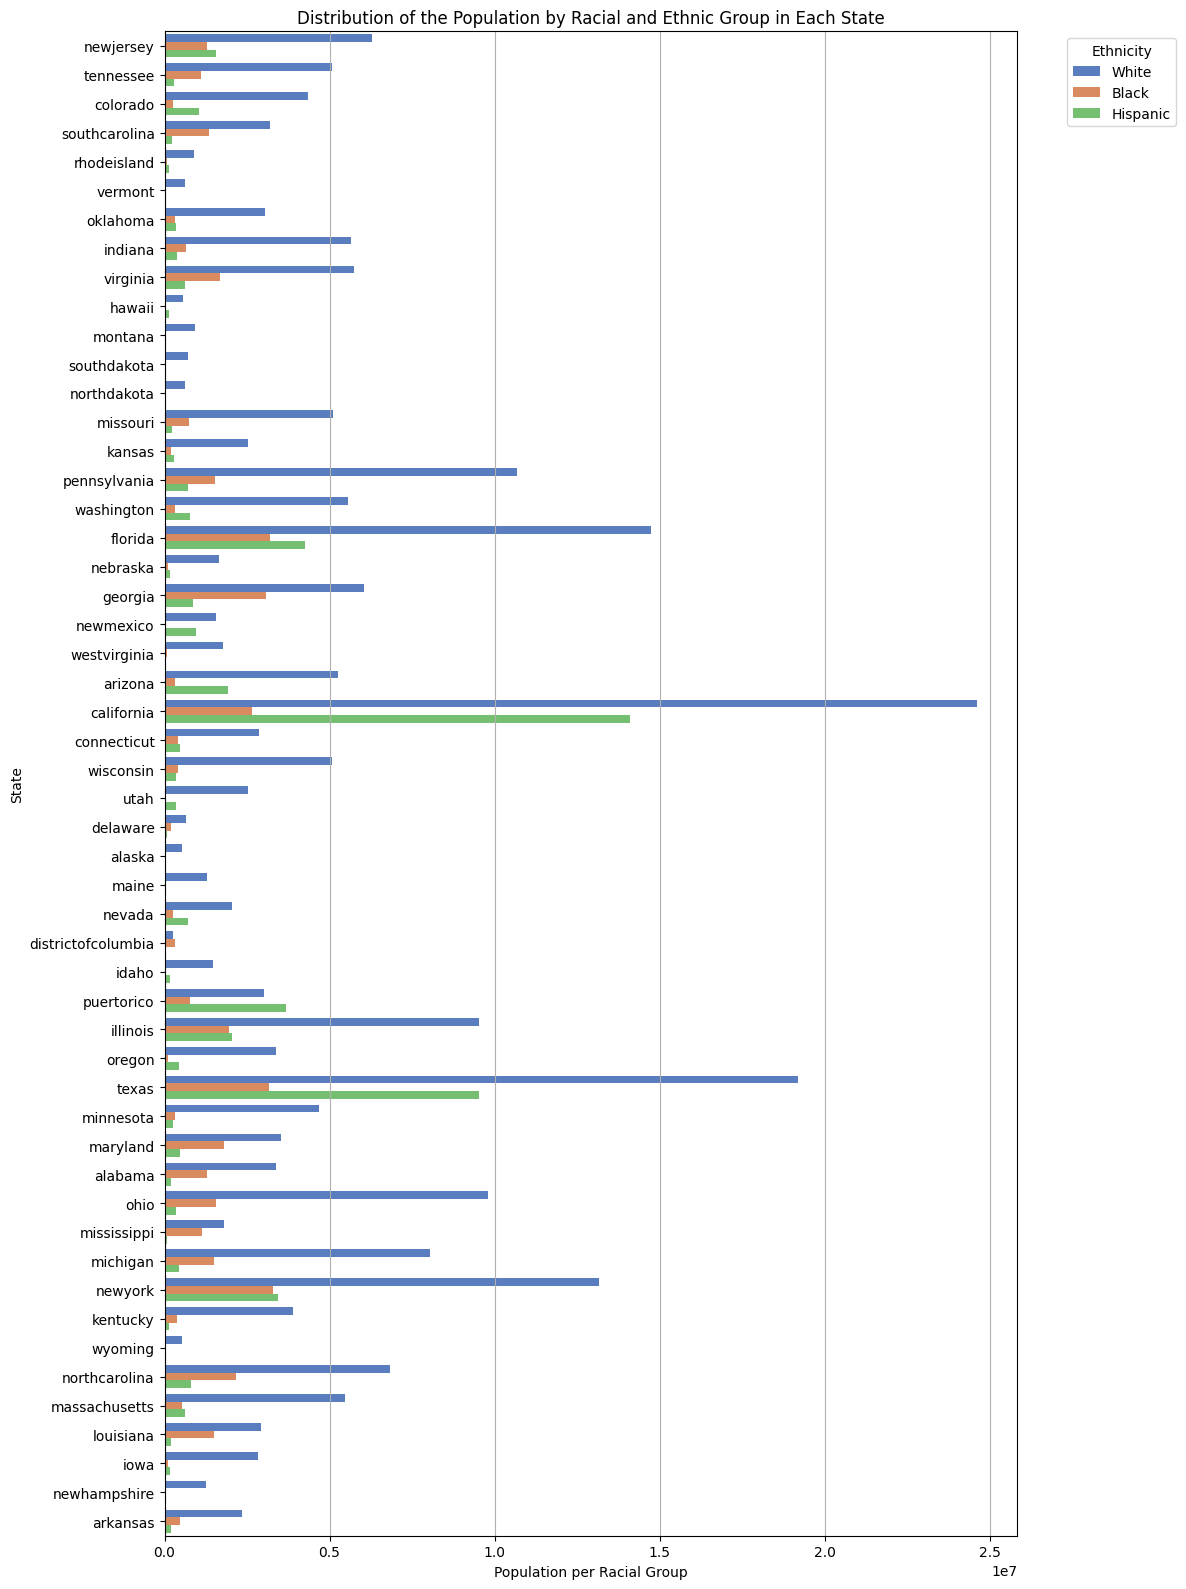

In [31]:
#  Distribution of the Population by Racial and Ethnic Group in Each State of America
plt.figure(figsize=(12, 16))
sns.barplot(data=census_poverty_table2, x='Census', y='State', hue='Ethnicity', dodge=True, palette='muted')
plt.title('Distribution of the Population by Racial and Ethnic Group in Each State')
plt.xlabel('Population per Racial Group')
plt.ylabel('State')
plt.grid(axis='x')
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

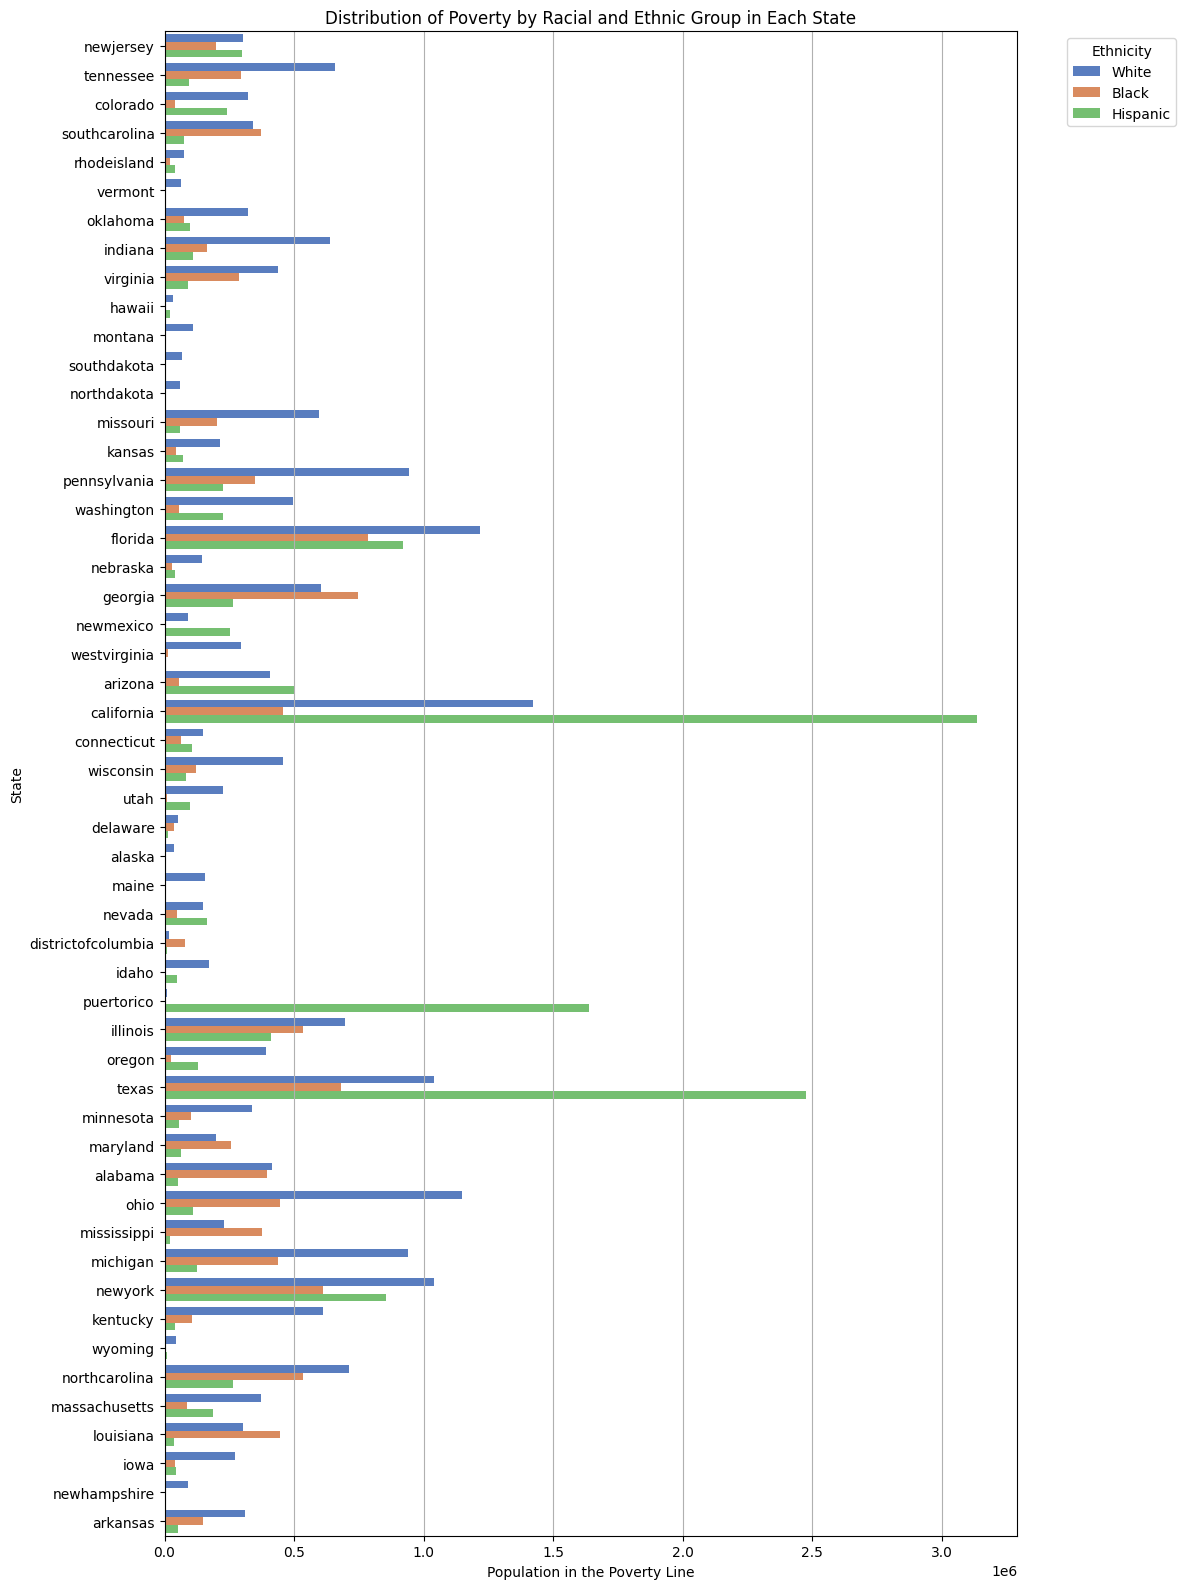

In [32]:
# Distribution of the Poverty by Racial and Ethnic Group in Each State of America
plt.figure(figsize=(12, 16))
sns.barplot(data=census_poverty_table2, x='Poverty', y='State', hue='Ethnicity', dodge=True, palette='muted')
plt.title('Distribution of Poverty by Racial and Ethnic Group in Each State')
plt.xlabel('Population in the Poverty Line')
plt.ylabel('State')
plt.grid(axis='x')
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This comparison underscores that, despite the larger size of the White population, Hispanic and Black communities endure a disproportionately higher rate of poverty. This disparity accentuates the profound impact poverty can exert on educational outcomes, as children and adolescents from impoverished backgrounds are likely to encounter additional hurdles in accessing sufficient educational resources, academic support, and learning opportunities.


## Dropout Rates Per Year

In [33]:
# marging and extracting tthe mean
situation_group = nces_table2.groupby(['Year']).agg({'Enrollment':'mean','Dropout':'mean'})

# dropout rates
situation_group['Dropout_rate'] = (situation_group['Dropout'] / situation_group['Enrollment']) * 100
situation_group

,Enrollment,Dropout,Dropout_rate
Year,,,
2002,18217.159722,513.292659,2.817633
2003,18262.766865,526.713294,2.884083
2004,18341.707341,530.594246,2.892829


The calculation of the dropout rate employed the subsequent formula, predicated upon the mean figures for "Enrollment" and "Dropout" across each "Ethnicity":

	Dropout Rate = Dropout/Enrollment X 100

Between the years 2002 and 2004, observable consistency in the variation of dropout rates across different grade levels was discerned. This consistency suggests that specific educational stages regularly face hurdles in maintaining student engagement and transcending the confines of the academic year.


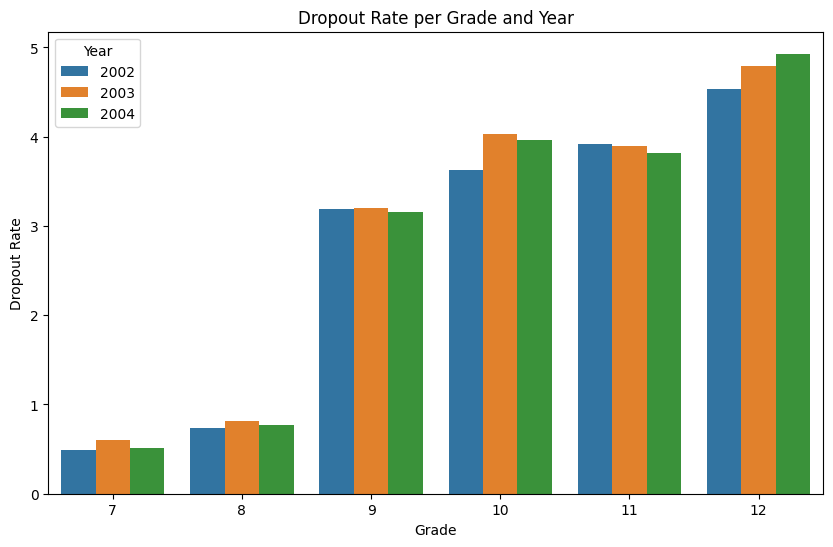

In [34]:
# Marging 
grade_group = nces_table2.groupby(['Year', 'Grade']).agg({'Enrollment':'mean','Dropout':'mean'}).reset_index()
grade_group['Dropout_rate'] = (grade_group['Dropout'] / grade_group['Enrollment']) * 100
# Convert 'Grade' to string 
grade_group['Grade'] = grade_group['Grade'].astype(str)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Grade', y='Dropout_rate', data=grade_group, hue='Year')
plt.title('Dropout Rate per Grade and Year')
plt.xlabel('Grade')
plt.ylabel('Dropout Rate')
plt.show()


Upon examining the dropout rates across various grade levels over the years, distinct disparities become evident. Specifically, the dropout rates in upper grades—10th through 12th—are markedly higher than those in the 7th through 9th grades. 

This phenomenon may correlate with legislative requirements in some States that mandate school attendance only up to the age of 16, typically the age of students in the 9th grade. Although there has been a policy shift towards extending compulsory education to the age of 18/19 since the year 2000, it is crucial to acknowledge that the dataset spans from 2002 to 2004.

When the analysis is pivoted to consider dropout rates by ethnic group, it becomes apparent that Black and Hispanic students exhibit elevated dropout rates, with the Black group recording the highest rates up to the 11th grade, at which point the Hispanic group surpasses them. Concurrently, the White group consistently demonstrates lower dropout rates across all grades:


## Dropout Rates per Ethniciy

In [35]:
# Marging per ethnicity
ethnicity_group = nces_table2.groupby(['Ethnicity']).agg({'Enrollment':'mean','Dropout':'mean'}).reset_index()
ethnicity_group['Dropout_rate'] = (ethnicity_group['Dropout'] / ethnicity_group['Enrollment']) * 100

ethnicity_group

,Ethnicity,Enrollment,Dropout,Dropout_rate
0,Black,10062.810516,440.931548,4.381793
1,White,34895.928571,709.765873,2.033950
2,Hispanic,9862.894841,419.902778,4.257399


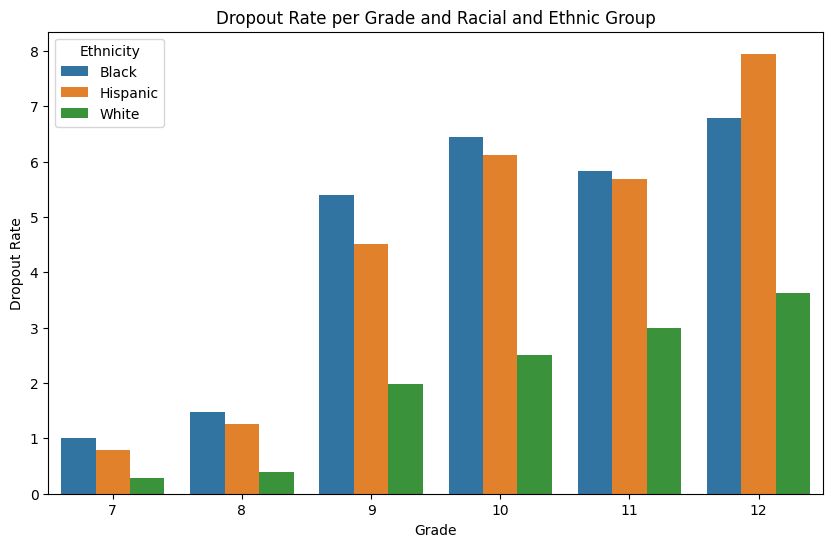

In [36]:
# marging per ethnicity grades
ethnicity_grade_group = nces_table2.groupby(['Ethnicity', 'Grade']).agg({'Enrollment':'mean','Dropout':'mean'}).reset_index()
ethnicity_grade_group['Dropout_rate'] = (ethnicity_grade_group['Dropout'] / ethnicity_grade_group['Enrollment']) * 100
ethnicity_grade_group['Grade'] = ethnicity_grade_group['Grade'].astype(str)

# Sorting by grade and ethnicity
grade_order = ['7', '8', '9', '10', '11', '12']
ethnicity_order = ['Black', 'Hispanic', 'White']

# plotting graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Grade', y='Dropout_rate', data=ethnicity_grade_group, hue='Ethnicity',
            order=grade_order, hue_order=ethnicity_order)
plt.title('Dropout Rate per Grade and Racial and Ethnic Group')
plt.xlabel('Grade')
plt.ylabel('Dropout Rate')
plt.legend(title='Ethnicity')
plt.show()

## Poverty and Dropout Rates Analysis


In [37]:
#calculating propotion of poverty vc porpotion of dropouts
census_poverty_group_rate = census_poverty_group.merge(ethnicity_group[['Ethnicity','Dropout_rate']], on='Ethnicity')
census_poverty_group_rate

,Ethnicity,Census,Poverty,percent_poverty,Dropout_rate
0,Black,42805394,9791800,22.875154,4.381793
1,Hispanic,54410670,13883300,25.515767,4.257399
2,White,239488042,20427600,8.529695,2.033950



The analysis reveals a correlation between poverty levels and school dropout rates by ethnicity. Ethnic groups with higher poverty rates are observed to have correspondingly higher school dropout rates. For instance, the "Black" and "Hispanic" ethnicities, which have a higher percentage of their populations in poverty, also experience higher school dropout rates compared to the "White" ethnicity, which has a lower percentage of its population in poverty:


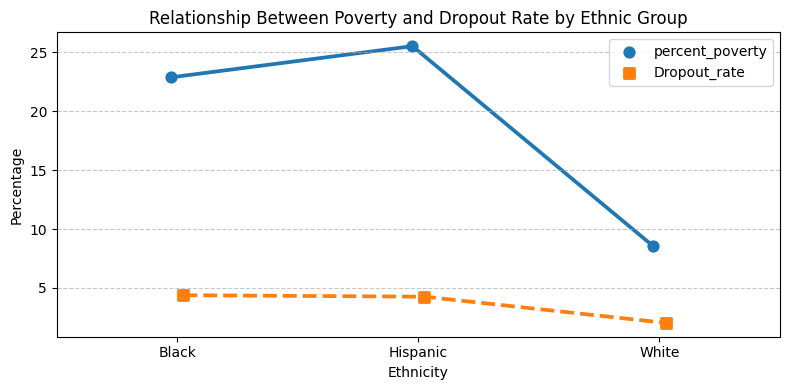

In [38]:
# melt method of Structure
melted_data = census_poverty_group_rate.melt(id_vars='Ethnicity', value_vars=['percent_poverty', 'Dropout_rate'],
                                             var_name='Variable', value_name='Value')

plt.figure(figsize=(8, 4))
sns.pointplot(x='Ethnicity', y='Value', hue='Variable', data=melted_data, dodge=True, markers=['o', 's'], linestyles=['-', '--'])
plt.title('Relationship Between Poverty and Dropout Rate by Ethnic Group')
plt.xlabel('Ethnicity')
plt.ylabel('Percentage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In conclusion, this research has embarked on an analytical journey to uncover the multifaceted nature of educational disparities. Through the transformation of datasets into linked data, a comprehensive analysis was conducted, shedding light on the significant disparities that exist between different ethnic groups in terms of both poverty rates and educational outcomes.

The demographic analysis indicates a disproportionate representation of poverty among ethnic groups, with the White population having a lower percentage of individuals living in poverty compared to the Black and Hispanic populations. This disparity is further magnified when examining dropout rates, where Black and Hispanic students are found to have higher rates than their White counterparts.

Moreover, the study highlights the strong correlation between poverty levels and dropout rates across ethnicities, suggesting that poverty serves as a substantial barrier to educational attainment. 

The findings from this research underscore the critical need for targeted interventions and policies aimed at addressing the root causes of poverty and its impact on educational equity. By understanding the complex interplay between poverty, ethnicity, and educational outcomes, stakeholders can better devise strategies to promote inclusivity and support for underrepresented and disadvantaged communities. 


## Project Evaluation

## Data Evaluation

Data Evaluation: The data Evaluation will be done with the detaframes used before conversion to rdf, to make sure the data was ready and suitable for conversion.

In [39]:
def data_evaluation(table):

    # Displaying first rowns of the census table to unsdertand the new structure 
    table.head()

    #Checking for any missing values
    missing_values = table.isnull().sum()

    # Data types
    data_types = table.dtypes

    # Check unique values for Unique Values
    unique_states = table['State'].unique()
    unique_ethnicities = table['Ethnicity'].unique()

     #Check for Duplicated Values
    table_duplicates = table.duplicated(subset=['State', 'Ethnicity'], keep=False).sum()

    #creating ti check the columns numbers of the table, if it is bigger then 3 it means that table is the 
    #NCES one and chacks need to be performed in the Grade column
    
    if len(table.columns) > 3:
        nces_unique_grades = table['Grade'].unique()
        nces_duplicates = table.duplicated(subset=['State', 'Ethnicity', 'Year', 'Grade'], keep=False).sum()

    print(table.head())
    print()
    print('Missing Values:')
    print(missing_values)
    print()
    print('data_types:')
    print(data_types)
    print()
    print('Unique States Values:')
    print(unique_states)
    print()
    print('Unique Ethnicities Values:')
    print(unique_ethnicities)
    print()
    if  len(table.columns) > 3:
        print('Unique Grades Values:')
        print(nces_unique_grades)
        print()
        print('Duplicated Values')
        print(nces_duplicates) 
    else:
        print('Duplicated Values')
        print(table_duplicates)

print('Census Table')
data_evaluation(census_table)
print()
print('PovertyKFF Table')
data_evaluation(porvertyKFF_table)
print('NCES Table')
data_evaluation(nces_table)

Census Table
        State Ethnicity    Census
0     alabama     White   3382838
1      alaska     White    526642
2     arizona     White   5242273
3    arkansas     White   2336002
4  california     White  24611291

Missing Values:
State        0
Ethnicity    0
Census       0
dtype: int64

data_types:
State        object
Ethnicity    object
Census        int32
dtype: object

Unique States Values:
['alabama' 'alaska' 'arizona' 'arkansas' 'california' 'colorado'
 'connecticut' 'delaware' 'districtofcolumbia' 'florida' 'georgia'
 'hawaii' 'idaho' 'illinois' 'indiana' 'iowa' 'kansas' 'kentucky'
 'louisiana' 'maine' 'maryland' 'massachusetts' 'michigan' 'minnesota'
 'mississippi' 'missouri' 'montana' 'nebraska' 'nevada' 'newhampshire'
 'newjersey' 'newmexico' 'newyork' 'northcarolina' 'northdakota' 'ohio'
 'oklahoma' 'oregon' 'pennsylvania' 'rhodeisland' 'southcarolina'
 'southdakota' 'tennessee' 'texas' 'utah' 'vermont' 'virginia'
 'washington' 'westvirginia' 'wisconsin' 'wyoming' 'puert

The comprehensive data evaluation conducted across the three datasets—census, NCES, and povertyKFF— revealed insights into their quality and structure, ensuring their suitability for further analysis. The census dataset is characterized by its enumeration of populations across various states and ethnicities. It demonstrates a high level of completeness, as there are no missing or duplicate values.

 Furthermore, the allocation of data types is found to be aligned with the nature of the dataset's content; with 'State' and 'Ethnicity' being categorized as strings, and 'Census' delineated as an int64 type. This classification is deemed apt for facilitating the requisite computations and analyses in subsequent stages. Moreover, the dataset demonstrates consistency by encompassing all U.S. states and focusing on 'White', 'Hispanic', and 'Black' ethnic groups, satisfying the specific requirements of the project.

Similarly, the NCES dataset offers insights into educational metrics such as enrollments and dropouts across different states and ethnic groups. It showcased no duplicated values, and the inclusion of the year and grade levels in the duplication check ensured an understanding of the educational landscape. Like the census data, it maintained consistency in the representation of states and ethnicities, extending the analysis with educational data without compromising integrity or coherence.

The povertyKFF dataset, focusing on poverty counts among different ethnic groups across states, mirrored the strengths of the previously mentioned datasets in terms of data completeness, accuracy, and consistency. 

It is also possible to identify the state and ethnicity categories across all three datasets, due to the approach of data standardization during the preparation of the datasets, which facilitates the integration of the three datasets for comprehensive socio-economic and educational analyses.


## RDF Conversion Evaluation

Codes commented as the result is too big, feel free to test them.

In [40]:
# census triples vis
# g = Graph()
# g.parse('census.rdf', format='xml')  

# for subj, pred, obj in g:
#     print(f"Triplo: {subj} {pred} {obj}")


In [41]:
# # poverty triples vis
# g = Graph()
# g.parse('poverty.rdf', format='xml')  

# for subj, pred, obj in g:
#     print(f"Triplo: {subj} {pred} {obj}")

In [42]:
# # nces triples vis
# g = Graph()
# g.parse('nces.rdf', format='xml')  

# for subj, pred, obj in g:
#     print(f"Triplo: {subj} {pred} {obj}")

Comparing original table, with tabel extracted from the rdf files

In [43]:
census_table_2[(census_table_2['State'].isin(['alabama', 'texas'])) & (census_table_2['Ethnicity'].isin(['White', 'Hispanic', 'Black']))].sort_values(['State','Ethnicity'])

,State,Ethnicity,Census
118,alabama,Black,1290667
119,alabama,Hispanic,182795
117,alabama,White,3382838
109,texas,Black,3159265
110,texas,Hispanic,9533880
108,texas,White,19191255


In [44]:
census_table[(census_table['State'].isin(['alabama', 'texas'])) & (census_table['Ethnicity'].isin(['White', 'Hispanic', 'Black']))].sort_values(['State','Ethnicity'])

,State,Ethnicity,Census
52,alabama,Black,1290667
104,alabama,Hispanic,182795
0,alabama,White,3382838
95,texas,Black,3159265
147,texas,Hispanic,9533880
43,texas,White,19191255


In [45]:
povertyKFF_table2[(povertyKFF_table2['State'].isin(['alabama', 'texas'])) & (povertyKFF_table2['Ethnicity'].isin(['White', 'Hispanic', 'Black']))].sort_values(['State','Ethnicity'])

,State,Ethnicity,Poverty
117,alabama,Black,395400
118,alabama,Hispanic,53400
116,alabama,White,414000
60,texas,Black,680700
61,texas,Hispanic,2475100
59,texas,White,1039400


In [46]:
porvertyKFF_table[(porvertyKFF_table['State'].isin(['alabama', 'texas'])) & (porvertyKFF_table['Ethnicity'].isin(['White', 'Hispanic', 'Black']))].sort_values(['State','Ethnicity'])

,State,Ethnicity,Poverty
52,alabama,Black,395400
104,alabama,Hispanic,53400
0,alabama,White,414000
95,texas,Black,680700
147,texas,Hispanic,2475100
43,texas,White,1039400


In [47]:
nces_table2[(nces_table2['State'].isin(['alabama', 'texas'])) & (nces_table2['Ethnicity'].isin(['White', 'Hispanic', 'Black']))].sort_values(['State','Ethnicity'])

,Year,State,Ethnicity,Grade,Enrollment,Dropout
512,2002,alabama,Black,7,22817,18
2847,2002,alabama,Black,8,20592,50
11,2002,alabama,Black,9,22993,605
2868,2002,alabama,Black,10,18847,642
1059,2002,alabama,Black,11,16022,659
...,...,...,...,...,...,...
1916,2004,texas,Hispanic,8,139472,1200
895,2004,texas,Hispanic,9,168187,5996
2859,2004,texas,Hispanic,10,123358,6473
183,2004,texas,Hispanic,11,102983,5269


In [48]:
nces_table[(nces_table['State'].isin(['alabama', 'texas'])) & (nces_table['Ethnicity'].isin(['White', 'Hispanic', 'Black']))].sort_values(['State','Ethnicity'])

,Year,State,Ethnicity,Grade,Enrollment,Dropout
0,2002,alabama,Black,7,22817,18
168,2002,alabama,Black,8,20592,50
336,2002,alabama,Black,9,22993,605
504,2002,alabama,Black,10,18847,642
672,2002,alabama,Black,11,16022,659
...,...,...,...,...,...,...
2283,2004,texas,White,8,131623,604
2451,2004,texas,White,9,147954,2146
2619,2004,texas,White,10,132020,2590
2787,2004,texas,White,11,123133,2874


In [49]:
print('Census Table')
data_evaluation(census_table_2)
print()
print('PovertyKFF Table')
data_evaluation(povertyKFF_table2)
print('NCES Table')
data_evaluation(nces_table2)

Census Table
       State Ethnicity   Census
0  newjersey     White  6278395
1  newjersey     Black  1293921
2  newjersey  Hispanic  1564037
3  tennessee     White  5079389
4  tennessee     Black  1117185

Missing Values:
State        0
Ethnicity    0
Census       0
dtype: int64

data_types:
State        object
Ethnicity    object
Census        int64
dtype: object

Unique States Values:
['newjersey' 'tennessee' 'colorado' 'southcarolina' 'rhodeisland'
 'vermont' 'oklahoma' 'indiana' 'virginia' 'hawaii' 'montana'
 'southdakota' 'northdakota' 'missouri' 'kansas' 'pennsylvania'
 'washington' 'florida' 'nebraska' 'georgia' 'newmexico' 'westvirginia'
 'arizona' 'california' 'connecticut' 'wisconsin' 'utah' 'delaware'
 'alaska' 'maine' 'nevada' 'districtofcolumbia' 'idaho' 'puertorico'
 'illinois' 'oregon' 'texas' 'minnesota' 'maryland' 'alabama' 'ohio'
 'mississippi' 'michigan' 'newyork' 'kentucky' 'wyoming' 'northcarolina'
 'massachusetts' 'louisiana' 'iowa' 'newhampshire' 'arkansas']

Uni

## Linked Data Evaluation

Making Queries to test Linked Data.

Those codes are commented as the results are too big, please feel free to test it.

In [50]:
# loading name and graph
linked_data_graph = Graph()
linked_data_graph.parse('linked_data_detailed.rdf', format='xml')

ex = Namespace("http://educationaldata.org/")

# Queries
query_poverty_data = """
PREFIX ex: <http://educationaldata.org/>
SELECT ?state ?poverty
WHERE {
  ?state a ex:State .
  ?state ex:Poverty ?poverty .
}
"""
query_census_data = """
PREFIX ex: <http://educationaldata.org/>
SELECT ?state ?census
WHERE {
  ?state a ex:State .
  ?state ex:Census ?census .
}
"""
query_nces_data = """
PREFIX ex: <http://educationaldata.org/>
SELECT ?enrollment
WHERE {
  ?recordUri ex:Enrollment_2002_7 ?enrollment .
}
"""


# saving and executing queries
poverty_results = linked_data_graph.query(query_poverty_data)
census_results = linked_data_graph.query(query_census_data)
nces_results = linked_data_graph.query(query_nces_data)


# #print results
# print("NCES Data:")
# for row in nces_results:
#     print(f"Enrollment: {row.enrollment}")


In [51]:
# print("Poverty Data:")
# for row in poverty_results:
#     print(f"State: {row.state}, Poverty: {row.poverty}")


In [52]:
# print("Census Data:")
# for row in census_results:
#     print(f"State: {row.state}, Census: {row.census}")